# 국가(대륙)별/상품군별 온라인 쇼핑 해외직접판매액

## K-Beauty는 성장하고 있을까? 해외 직접판매액를 한다면 어느 국가로 판매전략을 세우면 좋을까?
e:추정치, p:잠정치, -:자료없음, ...:미상자료, x:비밀보호, ∇:시계열 불연(단위: 백만원)

# 필요한 라이브러리 가져오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

# 마이너스 폰트 깨지는 문제
plt.rc("axes", unicode_minus=False)

# 레티나 설정ㅇ으로 글씨가 선명하게 
%config lnlineBackend.figure_format = 'retina'

# 데이터 로드

In [2]:
df_raw=pd.read_csv("온라인쇼핑.csv", encoding="cp949")
print(df_raw.shape)
df_raw.head(50)

(450, 27)


,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,749612,858240,833672,897205,921586,974060,1250236,1344404,1525396,1879499
1,합계,합계,면세점,-,-,-,-,-,-,-,...,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,138982,180356,168059,171886,159750,203404,179543,187246,189024,223864
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,2018,2158,5236,3854,4320,4511,3702,4038,3670,3826
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,5,1,2,6,1,215,2,0,1,70
5,합계,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,2013,2157,5234,3848,4319,4296,3700,4038,3669,3756
6,합계,가전·전자·통신기기,계,13259,13824,13560,14200,13399,13587,12857,...,19113,21696,25635,28160,27358,18073,21429,22798,25419,24131
7,합계,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,9006,12680,18038,21188,20481,11104,14072,15843,17370,15478
8,합계,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,10107,9016,7597,6972,6877,6969,7357,6955,8049,8653
9,합계,소프트웨어,계,361,330,372,595,807,484,591,...,98,316,244,379,313,408,150,228,144,387


In [3]:
# 국가(대륙)별 데이터 빈도수 세기

df_raw.columns
df_raw["국가(대륙)별"].value_counts()

유럽연합(EU)      45
아세안(ASEAN)    45
일본            45
중남미           45
기타            45
중동            45
대양주           45
미국            45
합계            45
중국            45
Name: 국가(대륙)별, dtype: int64

In [4]:
# 미국 데이터만 따로 보기

# boolean 인덱싱
df_raw["국가(대륙)별"] == "미국"

df_raw[df_raw["국가(대륙)별"] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40918,44861,55386,53848
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38261,41910,53568,52367
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1382
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,791,854,2033,1553,1784,1773,1298,1408,1653,1382
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2575,2394,1737,1716,1723,1886,1845,1837,3166,1785
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2546,2362,1672,1678,1651,1834,1779,1721,3059,1736
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,37,125,175,251,172,269,88,156,118,338


# 분석과 시각화를 위한 tidy data 만들기

In [5]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4'],
      dtype='object')

In [6]:
#id_vars로 인덱스 컬럼을 지정하고, value_vars로 열(컬럼)을 행(row)로 바꾼다 

df_raw.melt?

In [7]:
# id_vars에 들어가지 않는 컬럼은 value_vars에 자동으로 들어간다 

df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'])

,국가(대륙)별,상품군별,판매유형별,variable,value
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531
10797,기타,기 타,계,2019 4/4,1094
10798,기타,기 타,면세점,2019 4/4,1


In [8]:
df=df_raw.melt(id_vars=['국가(대륙)별', '상품군별', '판매유형별'], var_name="기간", value_name="백만원")
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531
10797,기타,기 타,계,2019 4/4,1094
10798,기타,기 타,면세점,2019 4/4,1


# 데이터 전처리

## 기간에서 연도와 분기를 분리하기

In [9]:
df["기간"]

print("2019 4/4".split())
print("2019 4/4".split()[0])
print(type("2019 4/4".split()[0]))
int("2019 4/4".split()[0])

['2019', '4/4']
2019
<class 'str'>


2019

In [10]:
# 기간에서 연도를 분리하여 수치형 데이터로 만들고, 연도 컬럼을 만들어 넣기

df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014
...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0,2019
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531,2019
10797,기타,기 타,계,2019 4/4,1094,2019
10798,기타,기 타,면세점,2019 4/4,1,2019


In [11]:
df["기간"]

print("2019 4/4".split()[1].split("/")[0])
print(type("2019 4/4".split()[1].split("/")[0]))
int("2019 4/4".split()[1].split("/")[0])

4
<class 'str'>


4

In [12]:
# 기간에서 분기를 분리하여 수치형 데이터로 만들고, 분기 컬럼을 만들어 넣기

df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531,2019,4
10797,기타,기 타,계,2019 4/4,1094,2019,4
10798,기타,기 타,면세점,2019 4/4,1,2019,4


## 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [13]:
# "-" 문자를 결측치로 변경하고 float 타입으로 변경하기

df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)
df

<ipython-input-13-0dc67ab86421>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)


,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10797,기타,기 타,계,2019 4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


## 필요없는 데이터 제거하기

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


In [15]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다

df.columns
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()

In [16]:
# info로 정보보기

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [17]:
# 결측치 보기 

df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화

## 전체 상품군 판매액

In [31]:
# 판매유형별 데이터의 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별 == "계" 데이터만 가져와서 봐야 
# 평균 값을 구하는 그래프에서 올바른 값을 표현할 수 있습니다 

df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


<AxesSubplot:xlabel='연도', ylabel='백만원'>

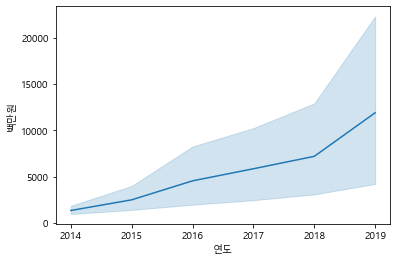

In [32]:
# 연도, 판매액 lineplot으로 그리기

sns.lineplot(data=df_total, x="연도", y="백만원")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

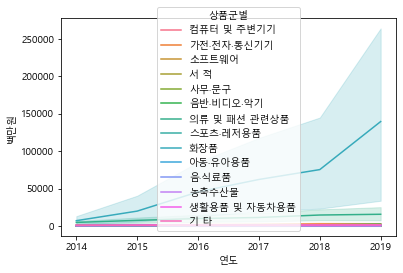

In [33]:
# 연도, 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시하기

sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")

*** legend를 그래프의 밖에 그리기 : 

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

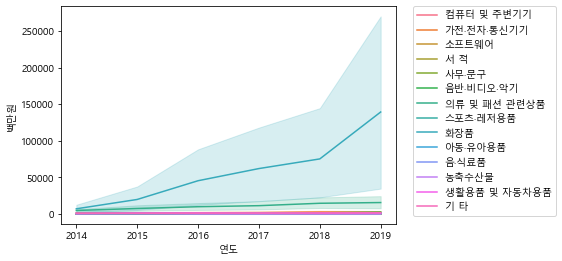

In [35]:
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

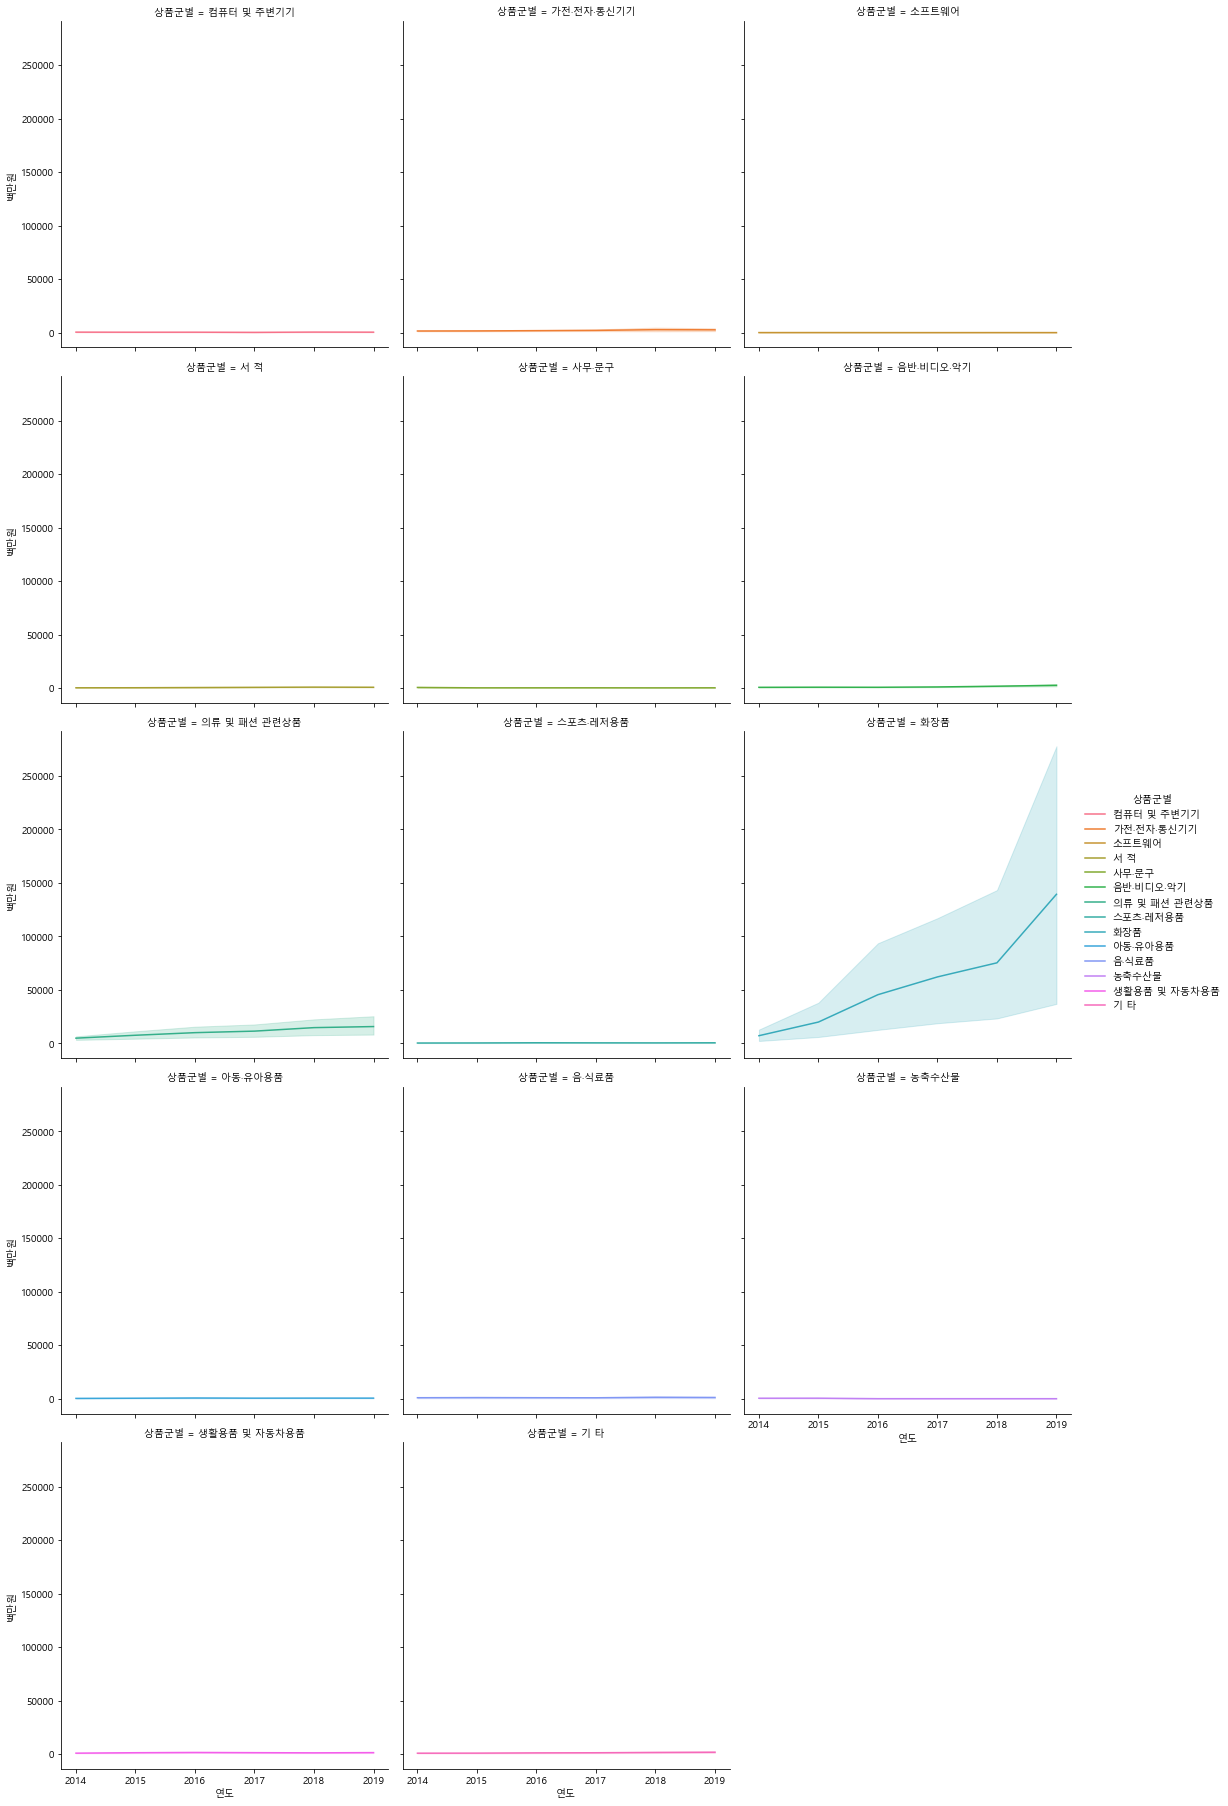

In [42]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기
# sns.relplot

sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=3)

In [49]:
# isin을 사용해 화장품만 제외하고 df_sub이라는 변수에 담습니다  (화장품의 값이 너무 커서 다른 값이 안보인)

df_sub = df_total[~df_total["상품군별"].isin(["화장품"])].copy()
df_sub.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


In [23]:
# 연도별 판매액을 상품군별로 relplot을 활용해 서브플롯으로 그려보기 

sns.relplot(data=df_sub, x="연도", y="백만원", )